In [17]:
#packages
# system tools
import os
os.system("pip install pandas scikit-learn matplotlib numpy")
#custom functions

# data munging tools
import pandas as pd

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [10]:
#get data, filter it out, filename, text, label, ts, seed, vectit?
def preprocDF(filename,text,label, fpl = ["..","in"], ts = .2, seed = 123, vectit = 1):
    #read from in folder

    #loop through all elements in filepath and join ´em
    step_count = 0
    for i in fpl:
        if step_count == 0:
            fp = i
        else:
            fp_temp = os.path.join(fp,i)
            fp = fp_temp

        step_count = step_count + 1


    #final filepath 
    fp_fin = os.path.join(fp,filename)
    #read in df
    df = pd.read_csv(fp_fin)
    #split training and test
    df_train, df_test = train_test_split(df,test_size= ts, random_state= seed)
    x_train, y_train = df_train[text],df_train[label]
    x_test, y_test = df_test[text],df_test[label]

    #vectorise it or not
    if vectit == 0:
        train_list = [x_train,y_train]
        test_list = [x_test,y_test]
    else:
        #create vectorizer specifically for ass_2
        vectorisation = TfidfVectorizer(ngram_range=(1,2),
                        lowercase = True,
                        max_df = .95,
                        min_df = .05,
                        max_features = 500)
        
        #apply vectorizer
        x_train_features = vectorisation.fit_transform(x_train)
        x_test_features = vectorisation.transform(x_test)
        train_list = [x_train_features,y_train]
        test_list = [x_test_features,y_test]
        
    return(train_list,test_list)


In [12]:
train_l, test_l = preprocDF(filename="fake_or_real_news.csv", text="text",label="label")


In [14]:
#define classifier
classifier = LogisticRegression(random_state=42).fit(train_l[0], train_l[1])
prediction = classifier.predict(test_l[0])

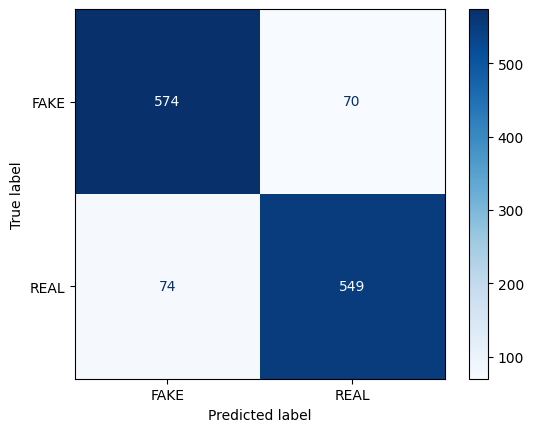

In [15]:
#confusion matrics
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            test_l[0],          # the training features
                                            test_l[1],                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])

In [20]:
classifier_metrics = metrics.classification_report(test_l[1], prediction)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.89      0.89      0.89       644
        REAL       0.89      0.88      0.88       623

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [13]:
## to do fisnish do on preproc func
## make textfile crispy
## make html? output with plots?

<5068x500 sparse matrix of type '<class 'numpy.float64'>'
	with 728509 stored elements in Compressed Sparse Row format>